In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
training = pd.read_csv("splits/training.csv")
training.drop(["index_number"], axis=1, inplace=True)
training

X_train = training.iloc[:, :4]
y_train = training.iloc[:, -1]

In [3]:
parameters = {
               "criterion": ["friedman_mse"],
              "loss":["squared_error"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.1,0.5],
              'max_depth': [3, 4, 5, 6, 7],
              'n_estimators': [250, 500, 1000]
              }

gbr = GradientBoostingRegressor()
gs = GridSearchCV(gbr, parameters, n_jobs=-1,cv = 5, verbose=1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['squared_error'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [250, 500, 1000]},
             verbose=1)

In [4]:
gs.best_score_

0.9685054601860585

In [5]:
gs.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 500}

## Testing

In [6]:
interpolation = pd.read_csv("splits/inter_total.csv") 
interpolation.drop(["index_number"], axis=1, inplace=True)
extrapolation = pd.read_csv("splits/extrapolation.csv")
extrapolation.drop(["index_number"], axis=1, inplace=True)

In [7]:
X_test_inter = interpolation.iloc[:, :4]
X_test_extra = extrapolation.iloc[:, :4]
y_test_inter = interpolation.iloc[:, -1]
y_test_extra = extrapolation.iloc[:, -1]

In [8]:
gs.best_estimator_.score(X_test_inter, y_test_inter)

0.9975566236399136

In [9]:
pred_inter = gs.best_estimator_.predict(X_test_inter)

In [10]:
print("Test Inter")
print(f"MSE: {mean_squared_error(y_pred=pred_inter, y_true=y_test_inter)}, MAE: {mean_absolute_error(y_pred=pred_inter, y_true=y_test_inter)}, R2: {r2_score(y_pred=pred_inter, y_true=y_test_inter)}")

Test Inter
MSE: 0.0007988005981371877, MAE: 0.02045842525102606, R2: 0.9975566236399136


In [11]:
gs.best_estimator_.score(X_test_extra, y_test_extra)

0.43667412025955044

In [12]:
pred = gs.best_estimator_.predict(X_test_extra)

In [13]:
print("Test Extra")
print(f"MSE: {mean_squared_error(y_pred=pred, y_true=y_test_extra)}, MAE: {mean_absolute_error(y_pred=pred, y_true=y_test_extra)}, R2: {r2_score(y_pred=pred, y_true=y_test_extra)}")

Test Extra
MSE: 3.802077093235158, MAE: 0.29609531423275615, R2: 0.43667412025955044


## Visualization

Text(0, 0.5, 'Expected')

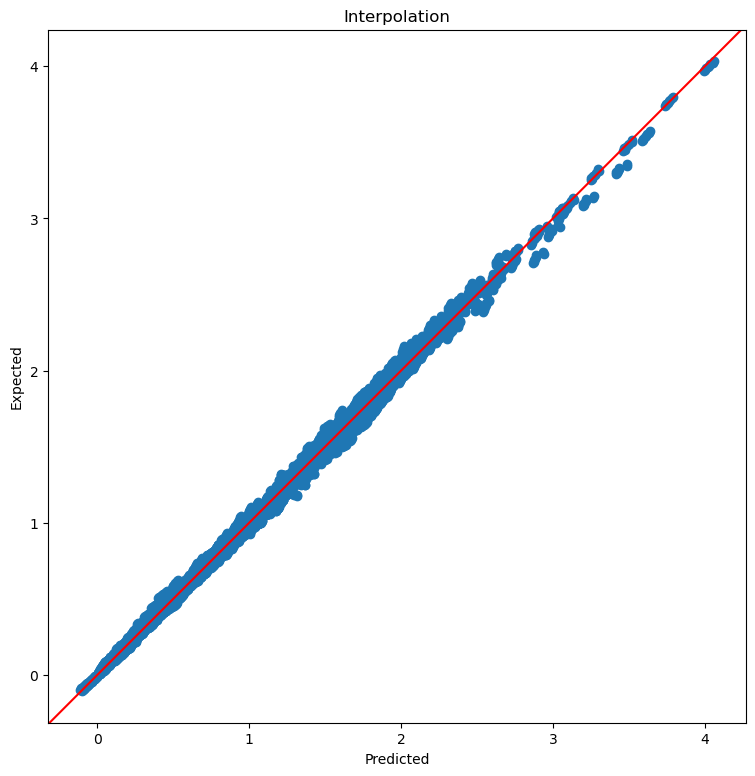

In [29]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(pred_inter, y_test_inter)

ax.axline([0, 0], [1, 1], color="red")
plt.title("Interpolation")
plt.xlabel("Predicted")
plt.ylabel("Expected")

Text(0, 0.5, 'Expected')

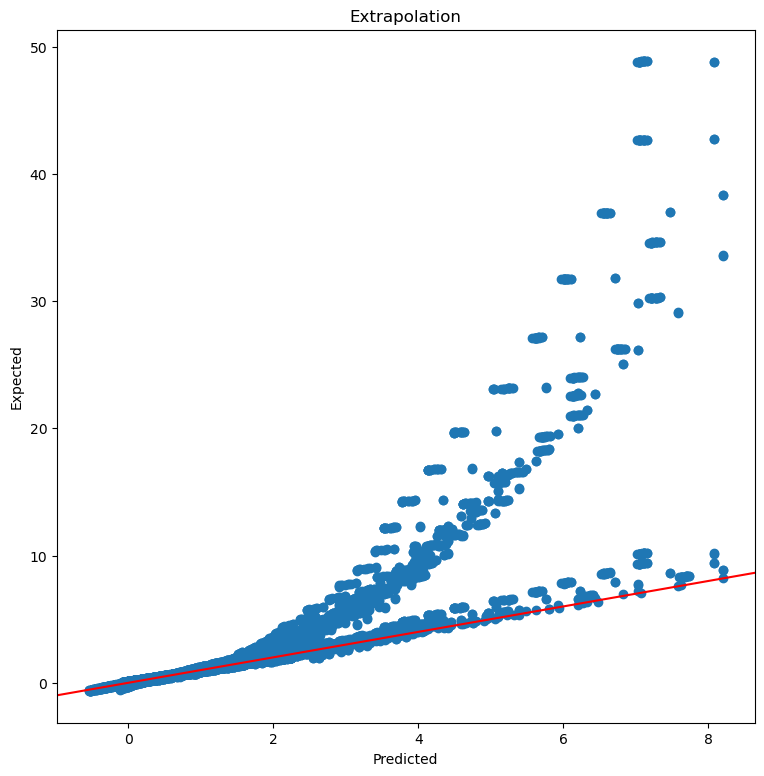

In [27]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(pred, y_test_extra)

ax.axline([0, 0], [1, 1], color="red")
plt.title("Extrapolation")
plt.xlabel("Predicted")
plt.ylabel("Expected")